In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/Users/dyadyundanil/Desktop/Machine learning/DATA/Advertising.csv')

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

X = df.drop('sales', axis=1)
y = df['sales']

Complexity_parameter = [2, 3, 4, 5, 6]
errors_test = []
errors_train = []
for par in Complexity_parameter:
    X_poly = PolynomialFeatures(degree=par, include_bias=False).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
    model = LinearRegression().fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    errors_train.append(mean_absolute_error(y_train, y_pred_train))
    
    y_pred_test = model.predict(X_test)
    errors_test.append(mean_absolute_error(y_test, y_pred_test))

Text(0.5, 1.0, 'Test Errors')

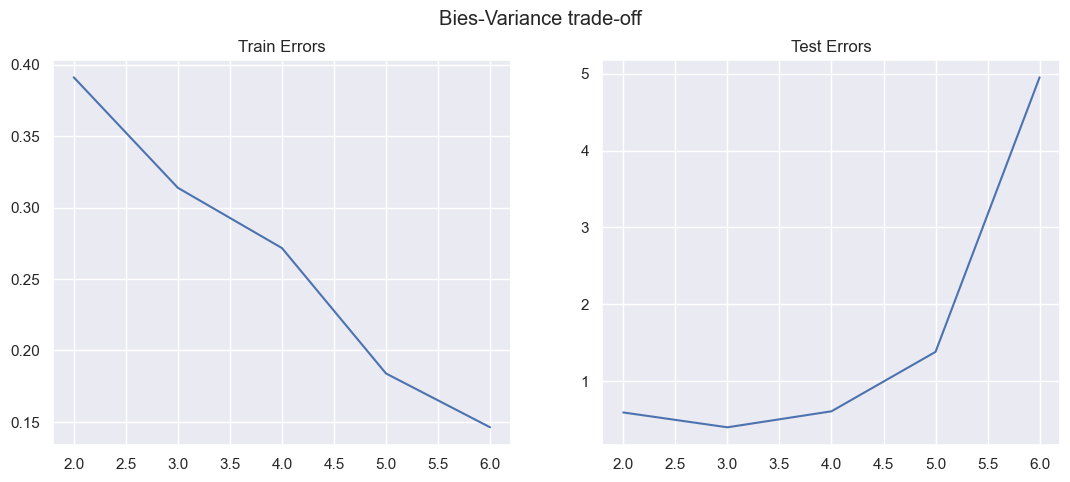

In [65]:
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
plt.suptitle('Bies-Variance trade-off')

sns.lineplot(x=Complexity_parameter, y=errors_train, ax=ax[0])
ax[0].set_title('Train Errors')

sns.lineplot(x=Complexity_parameter, y=errors_test, ax=ax[1])
ax[1].set_title('Test Errors')